In [ ]:
import sqlite3

# Step 1: Connect to SQLite database (creates if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create a sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Sample sales data to insert
sales_data = [
    ('Apple', 10, 0.50),
    ('Banana', 20, 0.30),
    ('Orange', 15, 0.40),
    ('Apple', 5, 0.50),
    ('Banana', 10, 0.30),
    ('Orange', 5, 0.40)
]

# Step 4: Insert the data
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)

# Step 5: Save changes and close connection
conn.commit()
conn.close()

print("Database created and sample data inserted!")


Database created and sample data inserted!


In [2]:
import sqlite3
import pandas as pd

# Step 1: Reconnect to the database
conn = sqlite3.connect("sales_data.db")

# Step 2: Write SQL to get sales summary
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Step 3: Execute and load results into a DataFrame
df = pd.read_sql_query(query, conn)

# Step 4: Close connection
conn.close()

# Step 5: Print DataFrame
print("📊 Sales Summary Table:\n")
print(df)


📊 Sales Summary Table:

  product  total_qty  revenue
0   Apple         15      7.5
1  Banana         30      9.0
2  Orange         20      8.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

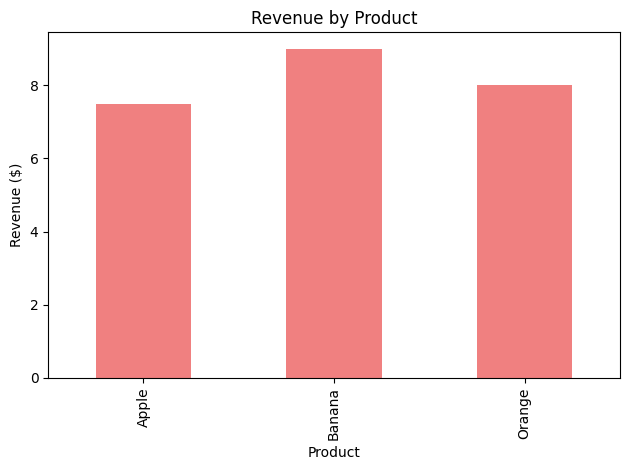

In [18]:
import matplotlib.pyplot as plt

# Plot the bar chart
ax = df.plot(kind='bar', x='product', y='revenue', color='lightcoral', legend=False)

# Customize chart with title and labels
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()  # Adjust layout to avoid clipping

# Now save the chart as an image
plt.savefig("sales_chart.png")  # Save image

# Optional: If you want to download it from Colab
from google.colab import files
files.download("sales_chart.png")


In [5]:
from google.colab import files
files.download("sales_data.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>